### **Apresentação do Dataset de Íris**

O dataset de íris é um dos datasets mais famosos na área de aprendizado de máquina e estatística. Este dataset foi introduzido por Ronald Fisher em 1936 como um exemplo de análise discriminante. É composto por 150 instâncias de medidas das características de três espécies de flores de íris (*Íris setosa, Íris virginica e Íris versicolor*). Cada instância contém quatro atributos: comprimento da sépala, largura da sépala, comprimento da pétala e largura da pétala, todos medidos em centímetros. Além desses quatro atributos, há uma coluna de rótulos $\{0,1,2\}$ que indica a espécie da íris.

Este dataset é frequentemente utilizado em tarefas de classificação, especialmente para técnicas de aprendizado supervisionado, onde o objetivo é prever a espécie de íris com base nas medidas das características da flor.

### Colunas do Dataset de Íris
O dataset de íris consiste em cinco colunas principais, cada uma descrevendo uma característica diferente das flores de íris. Aqui está um resumo de cada coluna:

*   Comprimento da Sépala (sepal length): Mede o comprimento da sépala de cada flor em centímetros. A sépala é a parte que protege o botão floral antes de abrir.

*   Largura da Sépala (sepal width): Mede a largura da sépala de cada flor em centímetros. Assim como o comprimento, a largura é um indicativo importante das características físicas da flor.

*   Comprimento da Pétala (petal length): Mede o comprimento da pétala de cada flor em centímetros. As pétalas são as partes coloridas das flores que são mais notáveis e atraem polinizadores.

*   Largura da Pétala (petal width): Mede a largura da pétala de cada flor em centímetros. A largura da pétala, juntamente com o comprimento, pode ser decisiva na determinação da espécie da íris.

*   Espécie (species): É a coluna de rótulo que identifica a qual das três espécies pertence cada amostra de íris. As espécies incluídas no dataset são: *Íris setosa, Íris versicolor* e *Íris virginica*.

### **O Problema a Resolver com o Perceptron**

O problema que resolveremos com o perceptron envolve a classificação das espécies de íris com base em suas características morfológicas. Especificamente, usaremos o perceptron para distinguir entre duas das três espécies de íris no dataset. O perceptron é um tipo de classificador binário e, portanto, inicialmente trabalharemos com duas espécies (por exemplo, *Íris setosa* e *Íris versicolor*).

O perceptron é um dos modelos mais simples de redes neurais artificiais e serve como fundamento para algoritmos mais complexos. Ele é utilizado para aprender um hiperplano que separa duas classes em um espaço de características. A aprendizagem ocorre através do ajuste iterativo dos pesos associados a cada característica, baseado nos erros de classificação das amostras durante o treinamento.

Ao longo deste notebook, exploraremos como o perceptron funciona, como ele pode ser implementado usando NumPy e como ele se comporta na classificação das espécies de íris com base em suas características.

In [2]:
# Importação das bibliotecas necessárias
import numpy as np  # Biblioteca para operações numéricas em arrays e matrizes
import matplotlib.pyplot as plt  # Biblioteca para criação de gráficos e visualizações
from sklearn import datasets  # Módulo para carregar conjuntos de dados pré-definidos
from sklearn.model_selection import train_test_split  # Função para dividir dados em treino e teste
from sklearn.preprocessing import StandardScaler  # Ferramenta para normalização dos dados
from sklearn.metrics import accuracy_score  # Função para calcular a acurácia de modelos

#### Alguns resultados com inicialização aleatória e sem treinamento

In [3]:
# Carregar o dataset Iris
iris = datasets.load_iris()  # Carrega o dataset Iris do sklearn
X = iris.data  # Matriz de características/features do dataset
y = iris.target  # Vetor de rótulos/targets correspondente

# Filtrar para obter apenas as classes 0 e 2
indices = np.where((y == 0) | (y == 2))  # Localiza índices das classes 0 e 2
X = X[indices]  # Filtra X para incluir apenas as amostras das classes 0 e 2
y = y[indices]  # Filtra y da mesma forma

# Como o dataset original codifica Iris Setosa como 0 e Iris Virginica como 2,
# você pode querer re-codificar os rótulos para simplificar (opcional):
y = np.where(y == 2, 1, 0)  # Re-codificar classe 2 como 1, classe 0 permanece 0
# Isso simplifica o problema para uma classificação binária entre as classes 0 e 1.

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.astype(float)
y_test = y_test.astype(float)
# test_size=0.2 significa que 20% dos dados serão usados para teste, o resto para treinamento.
# random_state=42 garante reprodutibilidade, usando sempre a mesma divisão.

# Normalização dos dados para melhor desempenho do modelo
scaler = StandardScaler()  # Inicializa o objeto StandardScaler
X_train = scaler.fit_transform(X_train)  # Calcula média e desvio padrão e transforma os dados de treinamento
X_test = scaler.transform(X_test)  # Aplica a mesma transformação nos dados de teste


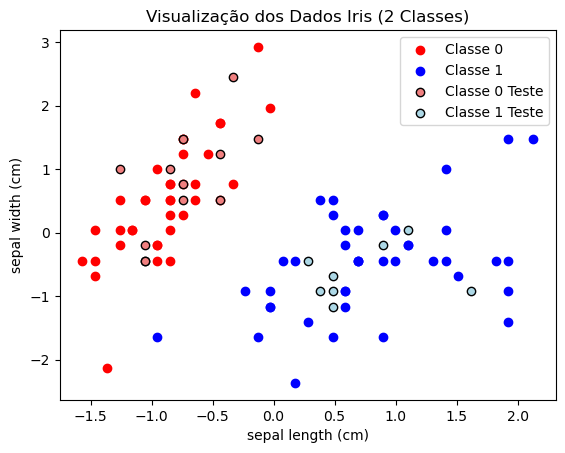

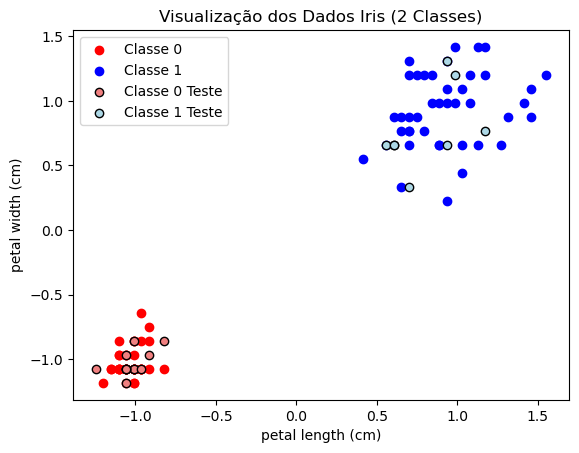

In [4]:
# Plot dos dados de treino
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Classe 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Classe 1')

# Plot dos dados de teste
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='lightcoral', label='Classe 0 Teste', edgecolor='k')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='lightblue', label='Classe 1 Teste', edgecolor='k')

plt.xlabel(f'{iris.feature_names[0]}')
plt.ylabel(f'{iris.feature_names[1]}')
plt.title('Visualização dos Dados Iris (2 Classes)')
plt.legend()
plt.show()

# Plot dos dados de treino
plt.scatter(X_train[y_train == 0][:, 2], X_train[y_train == 0][:, 3], color='red', label='Classe 0')
plt.scatter(X_train[y_train == 1][:, 2], X_train[y_train == 1][:, 3], color='blue', label='Classe 1')

# Plot dos dados de teste
plt.scatter(X_test[y_test == 0][:, 2], X_test[y_test == 0][:, 3], color='lightcoral', label='Classe 0 Teste', edgecolor='k')
plt.scatter(X_test[y_test == 1][:, 2], X_test[y_test == 1][:, 3], color='lightblue', label='Classe 1 Teste', edgecolor='k')

plt.xlabel(f'{iris.feature_names[2]}')
plt.ylabel(f'{iris.feature_names[3]}')
plt.title('Visualização dos Dados Iris (2 Classes)')
plt.legend()
plt.show()


Separar os dados em conjuntos de treino e teste é uma prática essencial em machine learning para garantir que um modelo seja capaz de generalizar bem para novos dados, isto é, para prever ou classificar corretamente dados que não foram usados durante o treinamento. Aqui estão os principais motivos e benefícios dessa separação:

### 1. **Prevenção de Overfitting**
- **Overfitting** ocorre quando um modelo de machine learning aprende os detalhes e o ruído nos dados de treino a tal ponto que afeta negativamente seu desempenho em novos dados. Um modelo com *overfit* se comporta muito bem em dados de treino mas pobremente em dados ainda não vistos, porque ele se torna excessivamente complexo, capturando padrões que não são generalizáveis.
- Separar os dados de teste ajuda a detectar overfitting ao fornecer uma métrica de quão bem o modelo performa em novas informações.

### 2. **Avaliação Realista do Desempenho**
- O conjunto de teste fornece uma maneira imparcial de avaliar a eficácia de um modelo. Quando usamos os dados de treino para avaliação, corremos o risco de obter uma estimativa otimista e não realista do desempenho do modelo.
- Os dados de teste, sendo independentes dos dados de treino, permitem testar se as inferências do modelo são válidas fora do conjunto original de dados. Isso é crucial para aplicações práticas onde o modelo precisa operar com dados que ele nunca viu.

### 3. **Ajuste de Hiperparâmetros**
- Os hiperparâmetros são configurações que não são aprendidas diretamente do processo de treinamento. Exemplos incluem a taxa de aprendizado, o número de camadas em uma rede neural, ou o número de vizinhos em K-Nearest Neighbors.
- Um conjunto separado de validação, muitas vezes retirado do conjunto de treino, ou técnicas como validação cruzada, podem ser usadas para ajustar esses hiperparâmetros. O conjunto de teste final deve ser usado apenas para testar o desempenho após todos os ajustes terem sido feitos, para evitar qualquer viés nos hiperparâmetros em relação aos dados de teste.

### 4. **Melhoria e Iteração do Modelo**
- Separar os dados em treino e teste também permite aos desenvolvedores iterar em seus modelos. Com base no desempenho nos dados de teste, eles podem voltar e ajustar o modelo, tentar diferentes técnicas de preprocessamento, escolher diferentes atributos ou até mesmo mudar completamente o algoritmo de aprendizado.


Em resumo, a separação dos dados em conjuntos de treino e teste é crucial para desenvolver modelos de machine learning que são robustos, confiáveis e capazes de generalizar bem para novos dados. Essa prática ajuda a garantir que os modelos que desenvolvemos se comportarão adequadamente quando colocados em uso prático, fornecendo resultados válidos e confiáveis.

Vamos gerar os pesos e bias para ilustra como fica o modelo sem treinamento

In [5]:
#Para sempre gerar os mesmo numero aleatorios
np.random.seed(10)
# Inicialização dos pesos e bias
weights = np.random.randn(X_train.shape[1])
bias = np.random.randn()
print(" Valores do pesos:",weights,"\n Valores do bias:",bias)

 Valores do pesos: [ 1.3315865   0.71527897 -1.54540029 -0.00838385] 
 Valores do bias: 0.6213359738904805


## Visualização da rede e fronteira de decisão 
Vamos definir um funçao para visualizar os dados e como os pesos gerados inicialmente classificam os dados

In [6]:
def sigmoid(z):
    """
    Função de Ativação Sigmóide.

    """
    return 1 / (1 + np.exp(-z))

def derivada_sigmoid(z):
    """
    Derivada da Função Sigmóide.

    """
    s = sigmoid(z)
    return s * (1 - s)

def derivada_erro_quadratico_medio(y_pred, y_true):
    """
    Derivada do Erro Quadrático Médio.
    
    :param y_pred: Vetor de predições do modelo.
    :param y_true: Vetor de valores verdadeiros.
    :return: Vetor de derivadas do erro quadrático médio.
    """
    return 2 * (y_pred - y_true) / y_true.size

def plot_decision_boundary(X, y, model_weights, model_bias, indice_f1=0, indice_f2=1):
    """
    Plota o limite de decisão para um modelo de classificação binária junto com os dados de entrada.
    
    :param X: Matriz de características dos dados de entrada.
    :param y: Vetor de rótulos verdadeiros (classes).
    :param model_weights: Vetor de pesos do modelo de classificação.
    :param model_bias: Bias do modelo de classificação.
    :param indice_f1: Índice da primeira característica a ser usada no plot (padrão é 0).
    :param indice_f2: Índice da segunda característica a ser usada no plot (padrão é 1).
    """
    # Definir os limites do gráfico
    x_min, x_max = X[:, indice_f1].min() - 0.5, X[:, indice_f1].max() + 0.5
    y_min, y_max = X[:, indice_f2].min() - 0.5, X[:, indice_f2].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Predizer para cada ponto no meshgrid
    Z = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], model_weights) + model_bias)
    Z = Z.reshape(xx.shape)
    
    # Contorno e preenchimento
    plt.contourf(xx, yy, Z, alpha=0.8, levels=np.linspace(0, 1, 3), cmap=plt.cm.coolwarm)
    plt.colorbar()

    # Plotar os pontos de dados
    plt.scatter(X[:, indice_f1], X[:, indice_f2], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel(f'{iris.feature_names[indice_f1]}')
    plt.ylabel(f'{iris.feature_names[indice_f2]}')



Veja abaixo como incializamos o perceptron com valores iniciais aleatórios e como se comportam no subespaços 2D abaixo

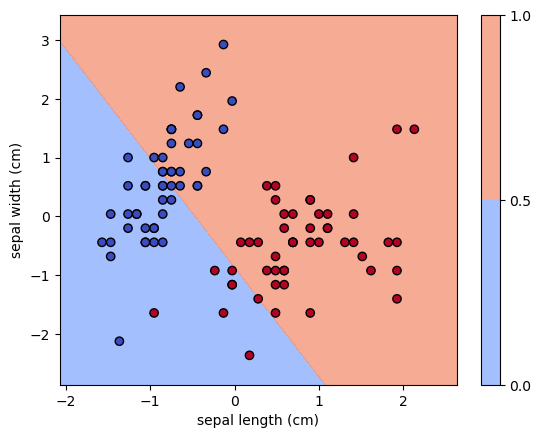

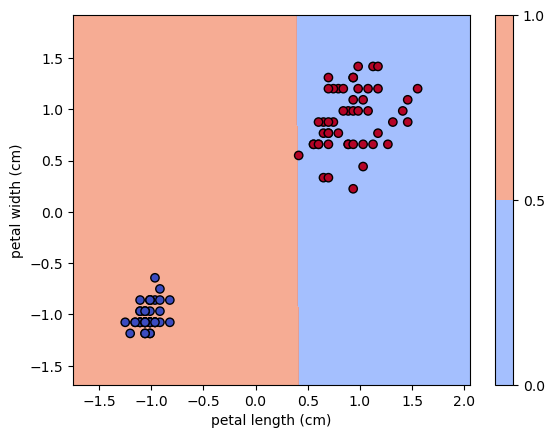

In [7]:
# Combina treino e teste para plotagem
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

# Dados do modelo (hipotético)
model_weights = np.array([ weights[0],  weights[1]])  # Substitua por seus pesos reais
model_bias = bias                   # Substitua pelo seu viés real
# Plotar a fronteira de decisão e os pontos
plot_decision_boundary(X_combined, y_combined, model_weights, model_bias,indice_f1=0,indice_f2=1)
plt.show()

model_weights = np.array([ weights[2],  weights[3]])  # Substitua por seus pesos reais
plot_decision_boundary(X_combined, y_combined, model_weights, model_bias,indice_f1=2,indice_f2=3)

plt.show()

#### Definindo funções de treinamento (backpropagation)

Abaixo temos as funções resposáveis pela atualização dos pesos e bias

In [8]:
def erro_quadratico_medio(y_pred, y_true):
    """
    Calcula o Erro Quadrático Médio (Mean Squared Error, MSE).
    """
    return np.mean((y_pred - y_true) ** 2)

def forward(X, weights, bias):
    """
    Realiza a propagação direta (forward pass) através de um perceptron simples.
    """
    z = np.dot(X, weights) + bias  # Combinação linear das entradas com os pesos e o bias
    return sigmoid(z)  # Aplicação da função sigmoid para obter a probabilidade

def backpropagation(X, y, y_pred, weights, bias, learning_rate):
    """
    Algoritmo de Backpropagation.
    
    :param X: Matriz de características dos dados de entrada.
    :param y: Vetor de rótulos verdadeiros.
    :param y_pred: Vetor de predições do modelo.
    :param weights: Vetor de pesos atual do modelo.
    :param bias: Bias atual do modelo.
    :param learning_rate: Taxa de aprendizado, controla o tamanho do passo na atualização.
    :return: Tupla contendo os pesos e bias atualizados.
    """
    # Derivada do erro
    error = y_pred - y
    d_error = derivada_erro_quadratico_medio(y_pred, y)
    
    # Derivadas da função de ativação
    z = np.dot(X, weights) + bias
    d_sigmoid = derivada_sigmoid(z)
    
    # Gradientes
    d_weights = np.dot(X.T, d_error * d_sigmoid)
    d_bias = np.sum(d_error * d_sigmoid)
    
    # Atualização dos pesos e bias
    weights -= learning_rate * d_weights
    bias -= learning_rate * d_bias

    return weights, bias

Vamos iniciar o treinamento

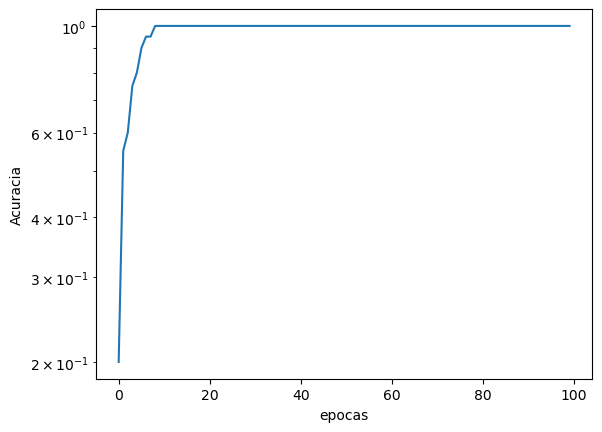

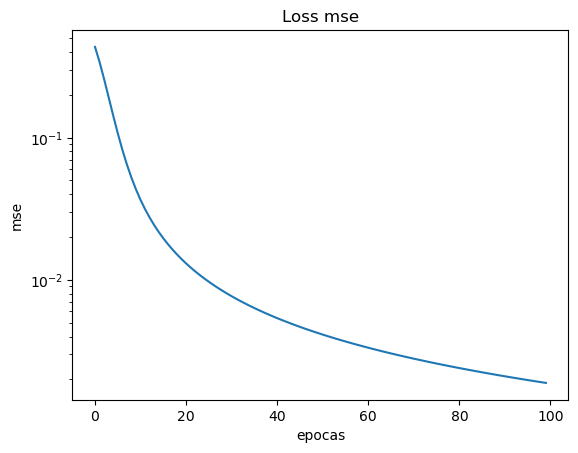

In [9]:
Loss_acuracia = []
Loss_mse = []

# Treinamento do modelo
for _ in range(100):
    for x, y in zip(X_train, y_train):
        y_pred = forward(x, weights, bias)
        weights, bias = backpropagation(x, y, y_pred, weights, bias, learning_rate=0.01)

    y_pred_test = [forward(x, weights, bias) > 0.5 for x in X_test]
    accuracy = accuracy_score(y_test, y_pred_test)
    y_pred_test = [forward(x, weights, bias) for x in X_test]
    mse  = erro_quadratico_medio(y_test, y_pred_test)

    Loss_acuracia.append(accuracy)
    Loss_mse.append(mse)

# Avaliação
plt.plot(Loss_acuracia)
plt.yscale('log')
plt.ylabel('Acuracia')
plt.xlabel('epocas')
plt.show()
plt.title("Loss mse")
plt.plot(Loss_mse)
plt.yscale('log')
plt.ylabel('mse')
plt.xlabel('epocas')
plt.show()

## Visualização da rede já treinada
Vamos visualizar o resultados dos parametros treinados

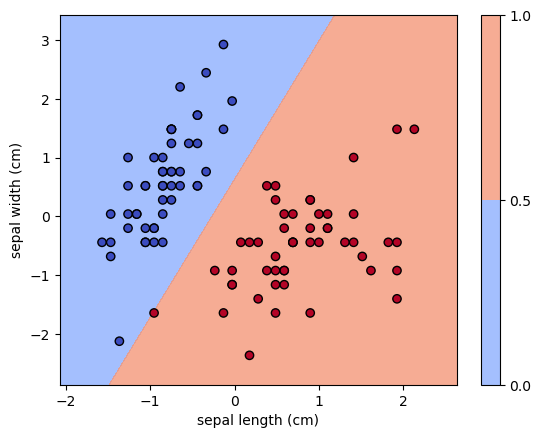

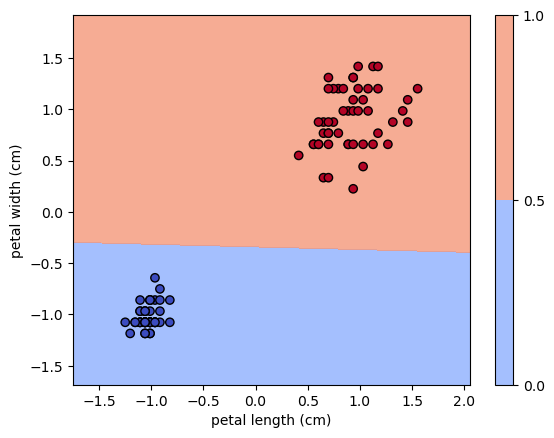

In [10]:
# Combina treino e teste para plotagem
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))


# Dados do modelo (hipotético)
model_weights = np.array([ weights[0],  weights[1]])  # Substitua por seus pesos reais
model_bias = bias                   # Substitua pelo seu viés real
# Plotar a fronteira de decisão e os pontos
plot_decision_boundary(X_combined, y_combined, model_weights, model_bias,indice_f1=0,indice_f2=1)
plt.show()

model_weights = np.array([ weights[2],  weights[3]])  # Substitua por seus pesos reais
plot_decision_boundary(X_combined, y_combined, model_weights, model_bias,indice_f1=2,indice_f2=3)

plt.show()